In [17]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from kneed import KneeLocator
from sklearn.metrics import f1_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

In [2]:
#Import iris dataset
iris = fetch_openml(name='iris')

C:\Users\aj\Anaconda3\lib\site-packages\sklearn\datasets\openml.py:305: UserWarning: Multiple active versions of the dataset matching the name iris exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]['version']))


In [3]:
# Have a look at the dataset
print(iris.target)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [4]:
# Dataset URL
iris.url

'https://www.openml.org/d/61'

In [5]:
# Non graphical EDA
iris.data.shape

(150, 4)

In [6]:
# Non graphical EDA
iris.target.shape

(150,)

In [7]:
# Non graphical EDA
np.unique(iris.target)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Non graphical EDA
iris.DESCR

"**Author**: R.A. Fisher  \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/Iris) - 1936 - Donated by Michael Marshall  \n**Please cite**: [UCI Citation Policy](https://archive.ics.uci.edu/ml/citation_policy.html)  \n\n**Iris Plants Database**  \nThis is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is     linearly separable from the other 2; the latter are NOT linearly separable from each other.\n\nPredicted attribute: class of iris plant.  \nThis is an exceedingly simple domain.  \n \n### Attribute Information:\n    1. sepal length in cm\n    2. sepal width in cm\n    3. petal length in cm\n    4. petal width in cm\n    5. class: \n       -- Iris Setosa\n       -- Iris Versicolour\n       -- Iris Virginica\n\n

In [9]:
# Non graphical EDA
iris.details

{'id': '61',
 'name': 'iris',
 'version': '1',
 'format': 'ARFF',
 'creator': 'R.A. Fisher',
 'collection_date': '1936',
 'upload_date': '2014-04-06T23:23:39',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://www.openml.org/data/v1/download/61/iris.arff',
 'file_id': '61',
 'default_target_attribute': 'class',
 'version_label': '1',
 'citation': 'https://archive.ics.uci.edu/ml/citation_policy.html',
 'tag': ['study_1',
  'study_25',
  'study_4',
  'study_41',
  'study_50',
  'study_52',
  'study_7',
  'study_86',
  'study_88',
  'study_89',
  'uci'],
 'visibility': 'public',
 'original_data_url': 'https://archive.ics.uci.edu/ml/datasets/Iris',
 'paper_url': 'http://digital.library.adelaide.edu.au/dspace/handle/2440/15227',
 'status': 'active',
 'processing_date': '2020-11-20 19:02:18',
 'md5_checksum': 'ad484452702105cbf3d30f8deaba39a9'}

In [10]:
# Converting dataset from numpy array to pandas dataframe
x = pd.DataFrame(data=iris.data, 
                 index=np.array(range(1, 151)), 
                 columns=np.array(range(1, 5)))

In [11]:
# Converting dataset from numpy array to pandas dataframe
y = pd.DataFrame(data=iris.target, 
                 index=np.array(range(1, 151)),
                 columns=np.array(range(1, 2)))

In [12]:
# Convering target class into numerical form
y[1] = y[1].replace(['Iris-setosa',
                     'Iris-versicolor','Iris-virginica'], [0,1,2])

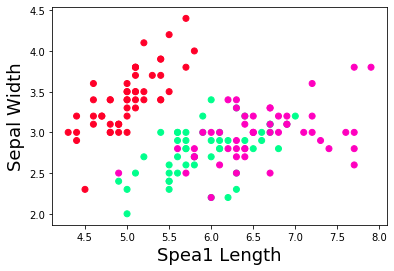

In [13]:
plt.scatter(x.iloc[:,0],x.iloc[:,1], c = y.iloc[:,0], cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)
plt.show()

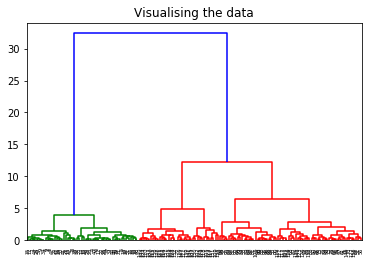

In [20]:
plt.title('Visualising the data')
Dendrogram = sch.dendrogram((sch.linkage(x, method ='ward')))

In [26]:
silhouette_coefficients = []


for k in range(2, 11):
    ac = AgglomerativeClustering(n_clusters=k)
    ac.fit(x)
    silhouette_s = silhouette_score(x, ac.labels_)
    silhouette_coefficients.append(silhouette_s)

In [27]:
silhouette_coefficients

[0.6863930543445408,
 0.5540972908150553,
 0.4887398491004218,
 0.4841553526240121,
 0.3618845152256815,
 0.34485408962742314,
 0.3462405312208591,
 0.33313850659637134,
 0.32916031163928877]

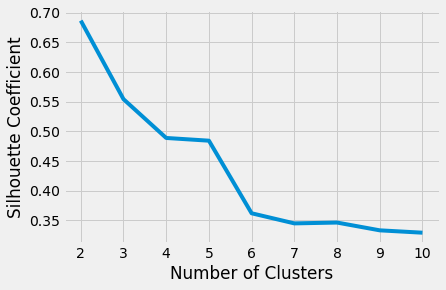

In [28]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [35]:
ac = AgglomerativeClustering(n_clusters=2)
ac.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [36]:
ac.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
pred_result = pd.DataFrame(data=ac.labels_,
          index=np.array(range(1, 151)),
          columns=np.array(range(1, 2)))

In [42]:
ari_ac = adjusted_rand_score(y.iloc[:,0], ac.labels_)

In [43]:
ari_ac

0.5681159420289855

In [44]:
f1_sc = f1_score(y, pred_result, average = 'macro')
print(f1_sc)

0.0


C:\Users\aj\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
